# 贷款用户逾期情况预测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import missingno as msno

from sklearn.model_selection import train_test_split #数据集切分

import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv("H:/data-analysis-item/Data_Mining_Practice-8/data.csv")
    #H:/data-analysis-item/Data_Mining_Practice-8/data.csv    E:/mypython/Data-Mining-Pratice-8/data.csv
data.shape

(4754, 90)

In [3]:
data.head(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


In [4]:
data = data.drop(['Unnamed: 0','custid'], axis=1)  #删除无意义的index

## Task1 数据探索与分析

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 88 columns):
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
student_feature                               1756 non-null float64
repayment_cap

**目标变量的分布**

In [6]:
data.status.value_counts()

0    3561
1    1193
Name: status, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C571E9F98>],
      dtype=object)

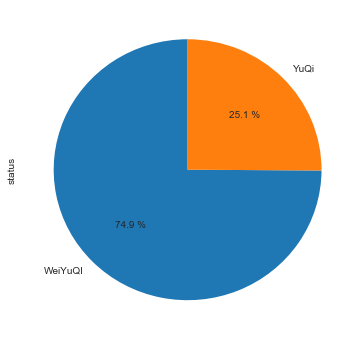

In [7]:
status_pie = pd.value_counts(data['status'])
status_pie.index = ["WeiYuQI","YuQi"]
labes = status_pie.index
status_pie.plot(kind='pie', subplots=True, figsize=(6, 6),autopct='%3.1f %%',startangle = 90)

**筛选出object属性的变量**

In [8]:
objectcol = data.select_dtypes(include='object')
objectcol.iloc[1]

trade_no                   20180507121002192000000023073000
bank_card_no                                            卡号1
reg_preference_for_trad                                一线城市
source                                                   xs
id_name                                                 崔向朝
latest_query_time                                2018-05-03
loans_latest_time                                2018-05-05
Name: 1, dtype: object

In [9]:
print(objectcol.bank_card_no.value_counts())  #对建模无意义，可删除
print(objectcol.reg_preference_for_trad.value_counts())
print(objectcol.source.value_counts())  #对建模无意义 ，可删除

卡号1    4754
Name: bank_card_no, dtype: int64
一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64
xs    4754
Name: source, dtype: int64


In [10]:
#无关变量的筛选
data.drop(['trade_no', 'bank_card_no', 'source', 'id_name'], axis=1,inplace=True)
data.drop(['first_transaction_time', 'latest_query_time', 'loans_latest_time'],axis=1, inplace=True)
#latest_query_time最新查询时间   loans_latest_time最新贷款时间 'latest_query_time','loans_latest_time','first_transaction_time' 暂且删除

数据类型转发：对object类型中的reg_preference_for_trad的数据替换

In [11]:
mapping_dict = {
    "reg_preference_for_trad":{
        "一线城市":1,
        "二线城市":2,
        "三线城市":3,
        "境外":4,
        "其他城市":5      
    }
}

data = data.replace(mapping_dict)#变量映射
data['reg_preference_for_trad'].head()  #查看效果

0    1.0
1    1.0
2    1.0
3    3.0
4    1.0
Name: reg_preference_for_trad, dtype: float64

**缺失值处理**

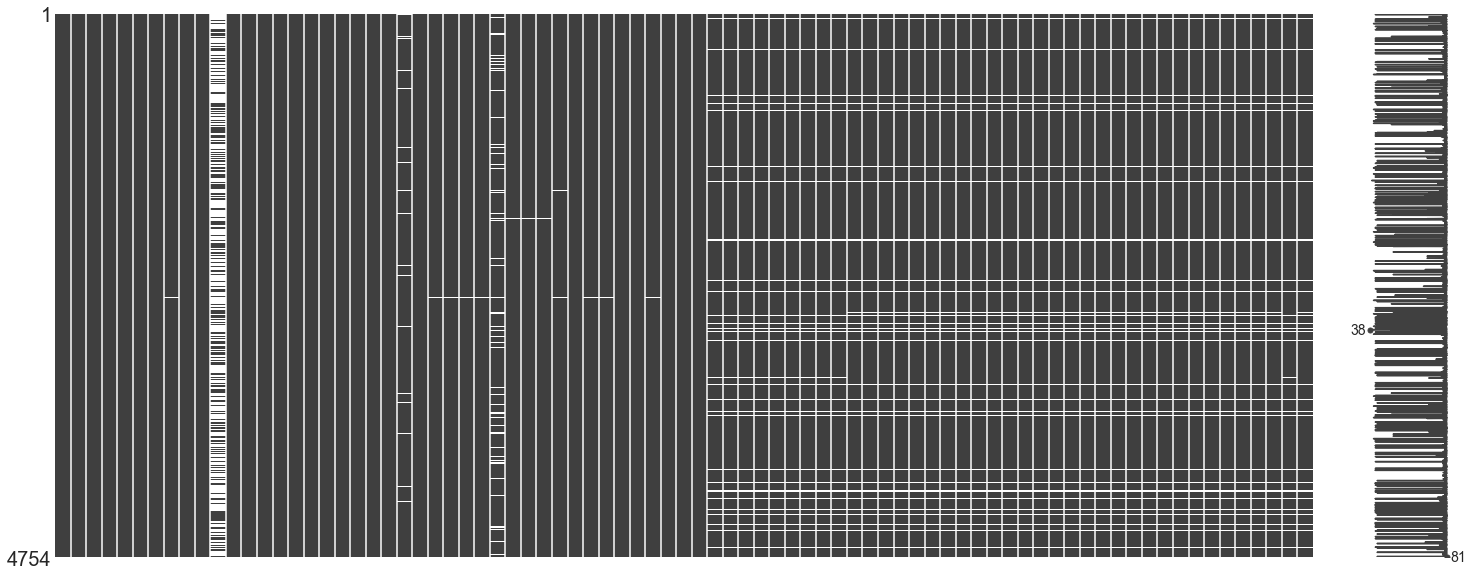

In [12]:
#数据整体情况
msno.matrix(data)

In [13]:
#计算各特征的缺失个数
data.isnull().sum().sort_values(ascending=False).head(15)

student_feature                     2998
cross_consume_count_last_1_month     426
latest_one_month_apply               304
query_finance_count                  304
latest_six_month_apply               304
latest_three_month_apply             304
query_cash_count                     304
query_sum_count                      304
query_org_count                      304
apply_credibility                    304
apply_score                          304
latest_query_day                     304
latest_one_month_loan                297
loans_score                          297
loans_credibility_behavior           297
dtype: int64

In [14]:
#用0填充student_feature的缺失值，假设缺失值不为学生
data['student_feature'][data['student_feature'].isnull()]=0
data.student_feature.head(5)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: student_feature, dtype: float64

In [15]:
#多数的特征缺失值个数为297个，找出index
na_index = data['latest_one_month_loan'][data['latest_one_month_loan'].isnull()].index

In [16]:
#删除这部分数据的观测
data = data.drop(index=na_index, axis=0)

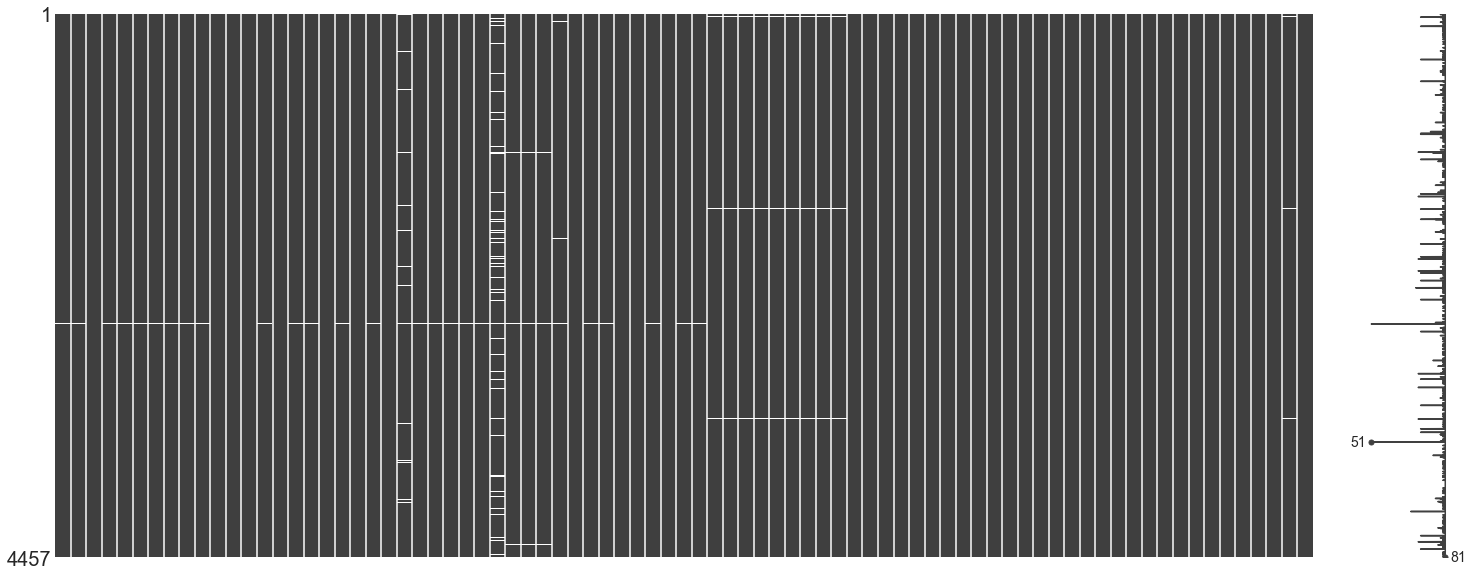

In [17]:
msno.matrix(data)

In [18]:
#筛选出还有缺失值的变量，用均值填充
na_col = data.isnull().sum().sort_values(
    ascending=False)[data.isnull().sum().sort_values(
        ascending=False) > 0].index

for i in na_col:
    data[i] = data[i].fillna(data[i].median())

**根据特征中的同值比例筛选**

In [19]:
equi_fea = []
for i in data.columns:
    try:
        mode_value = data[i].mode()[0]
        mode_rate = (data[i].value_counts()[0]) / data.shape[0]
        if mode_rate > 0.9:
            equi_fea.append([i, mode_value, mode_rate])
    except:
        pass
#众数占整体的比例，筛选出大于90%的变量

In [20]:
e=pd.DataFrame(equi_fea,columns=['col_name','mode_value','mode_rate'])
e.sort_values(by='mode_rate')

,col_name,mode_value,mode_rate
1,railway_consume_count_last_12_month,0.0,0.980256
0,is_high_user,0.0,0.988782
2,jewelry_consume_count_last_6_month,0.0,0.991250


In [21]:
#该部分变量对建模无意义，删除
data = data.drop(e.col_name,axis=1)
data.shape

(4457, 78)

**切分数据集**

In [22]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=2018)
train_data.to_csv('./train.csv', index=False, header=True)
test_data.to_csv('./test.csv', index=False, header=True)

## Task2 特征工程
### 特征清洗

**异常值处理**——怎么辨别？处理方法?

In [23]:
#提取出数值变量
data_num = data.select_dtypes('number').copy()
print(data_num.shape)

(4457, 78)


绘制小提琴图查看数据分布情况

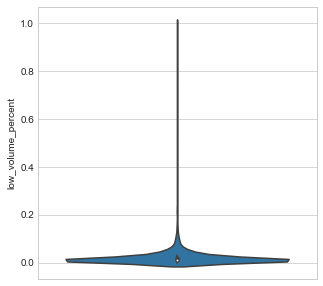

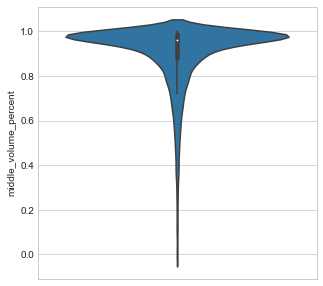

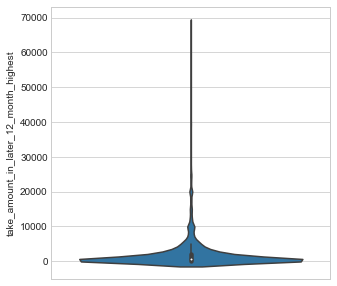

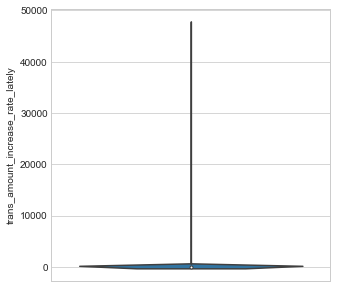

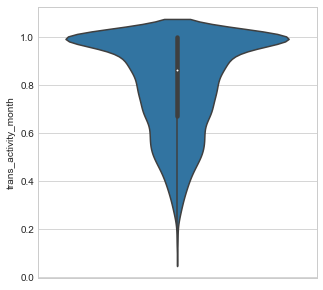

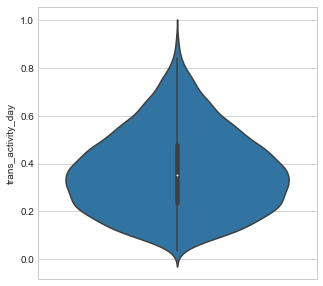

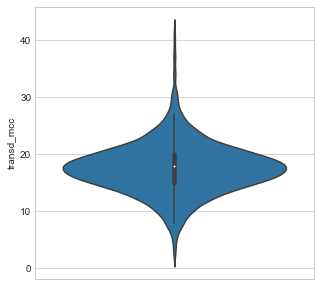

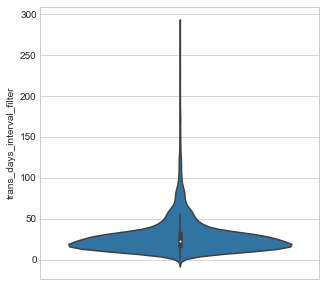

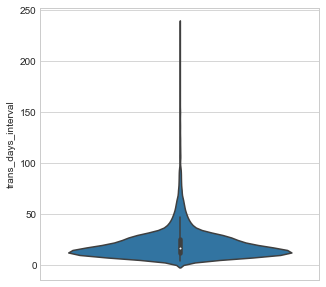

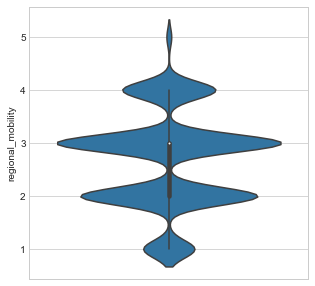

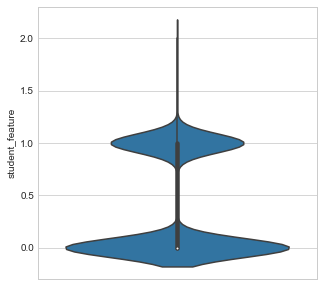

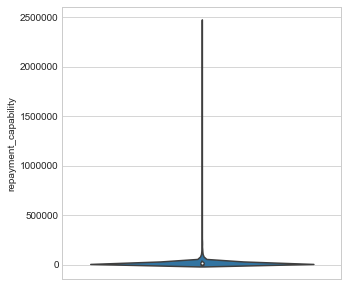

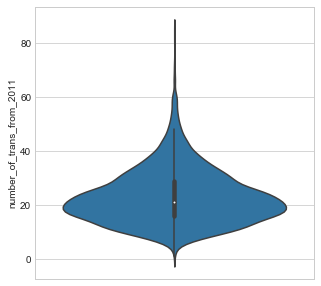

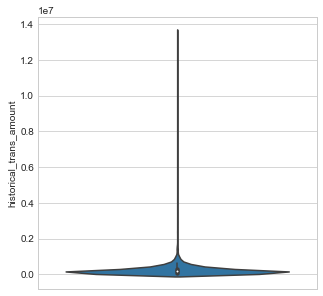

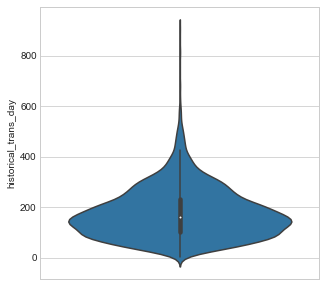

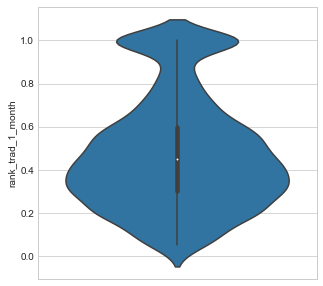

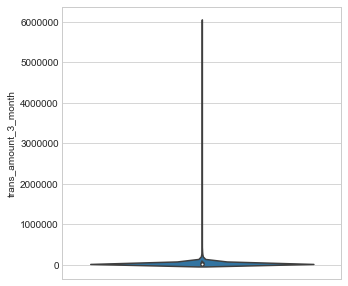

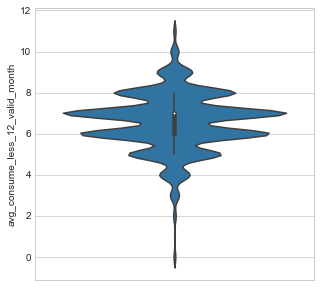

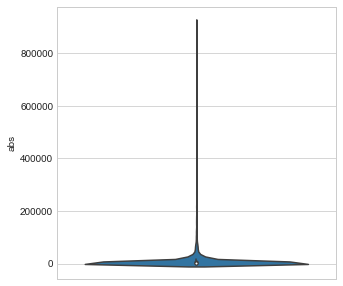

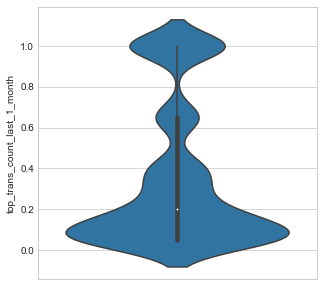

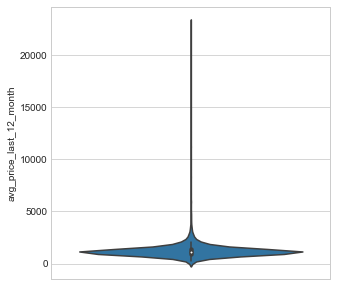

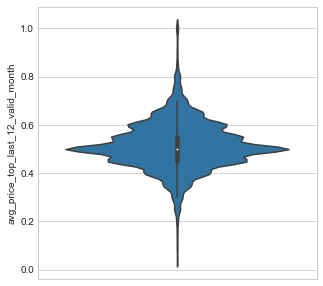

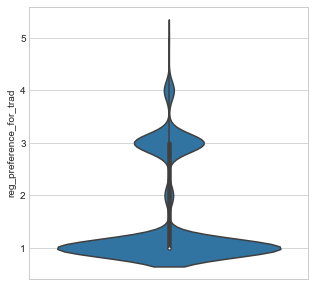

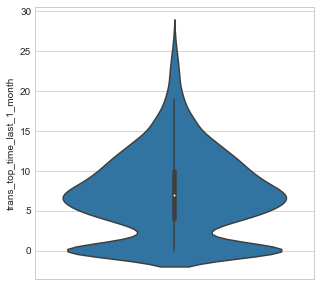

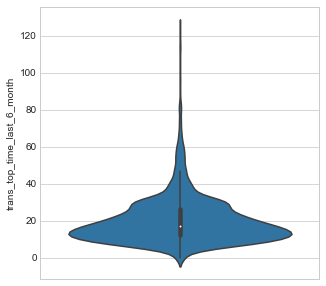

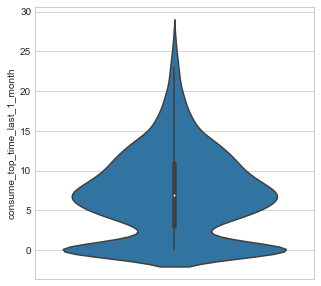

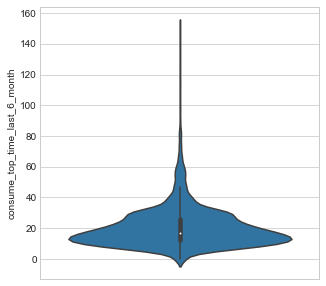

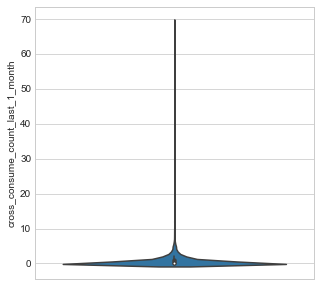

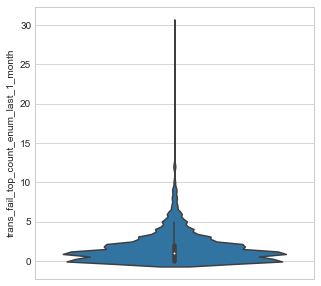

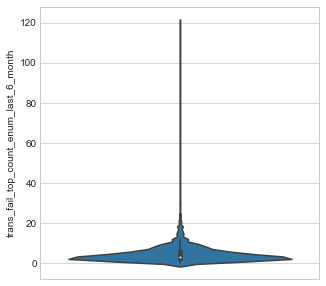

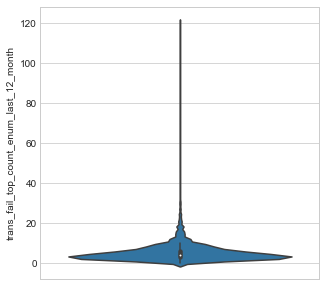

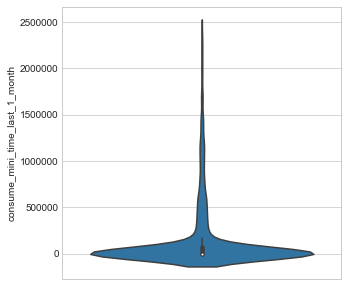

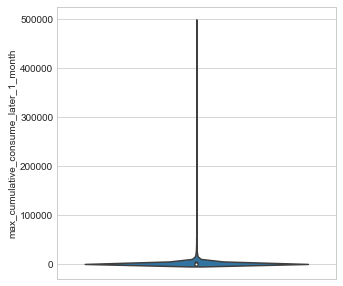

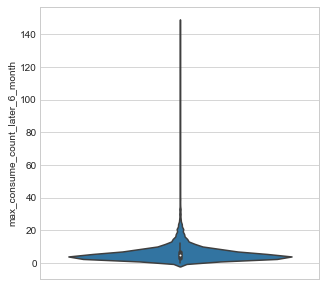

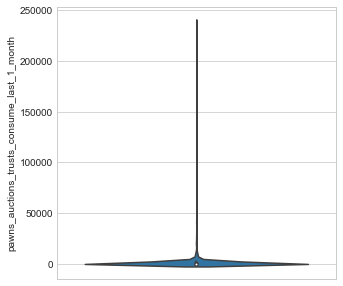

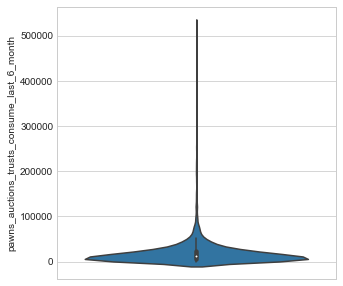

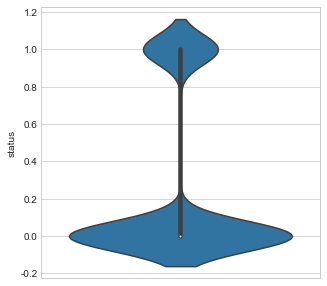

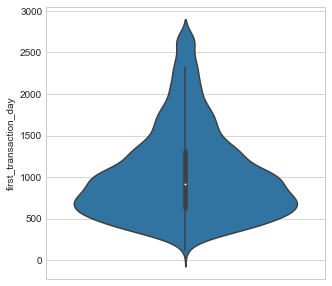

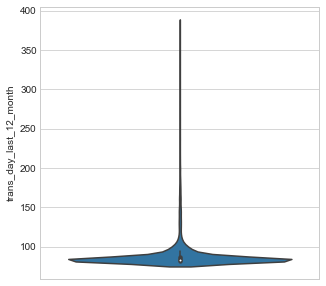

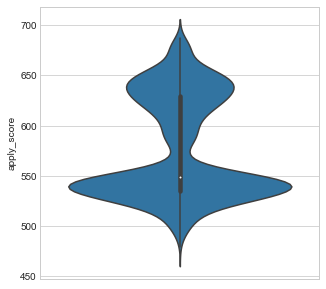

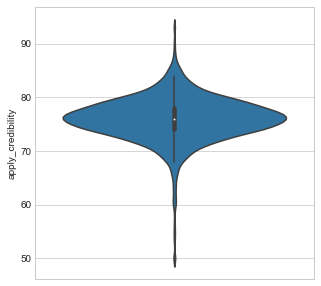

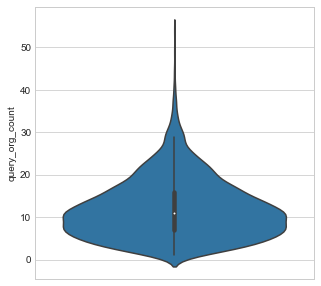

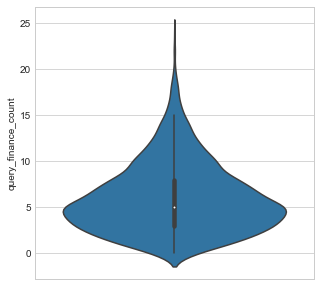

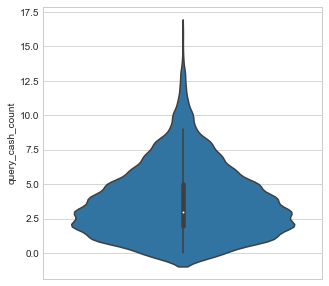

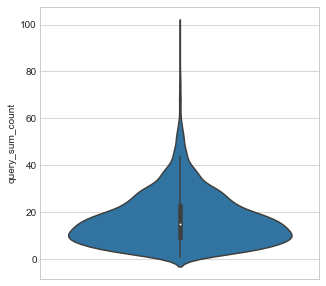

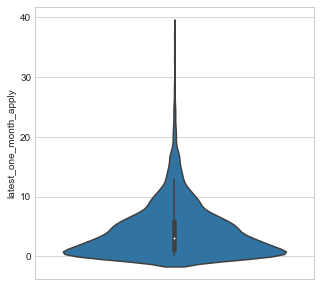

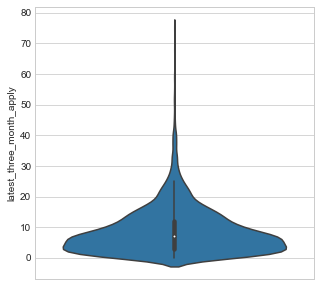

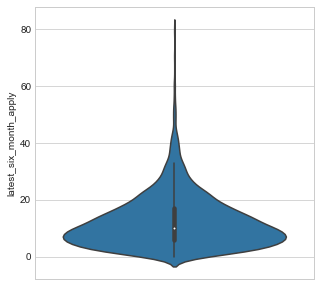

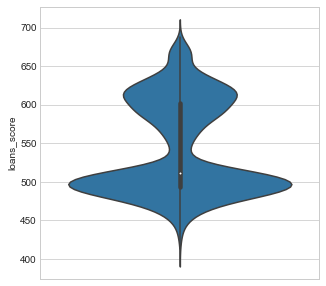

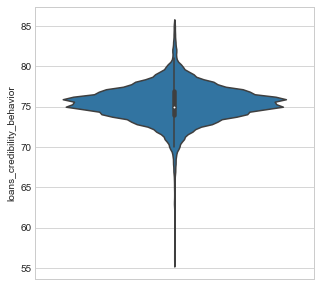

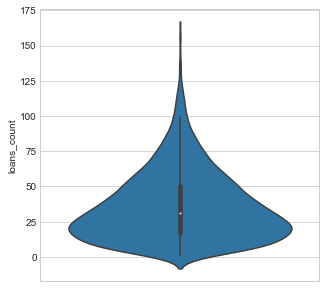

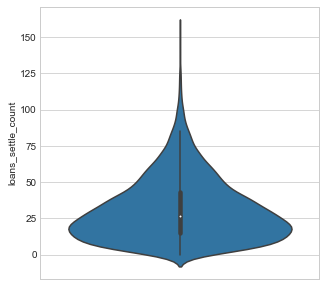

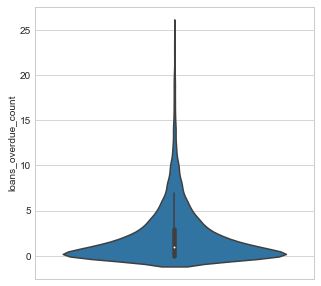

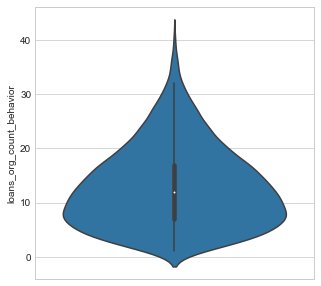

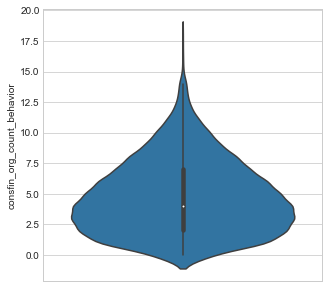

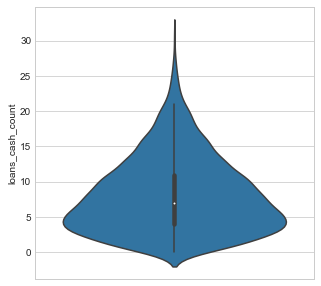

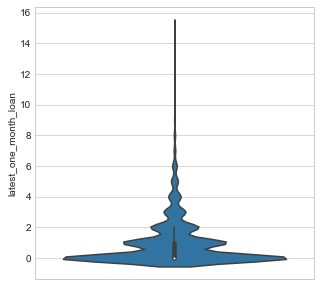

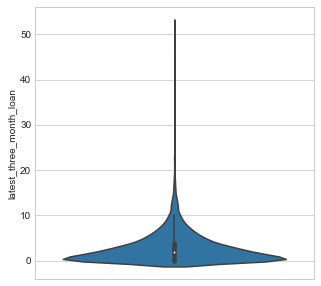

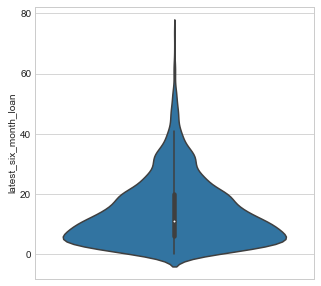

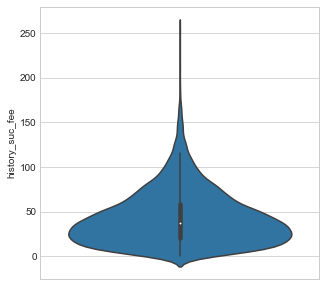

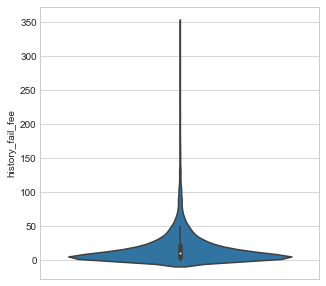

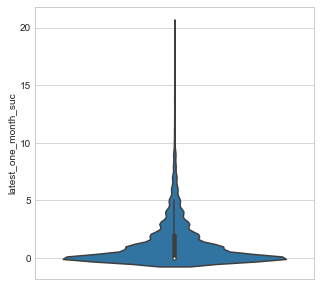

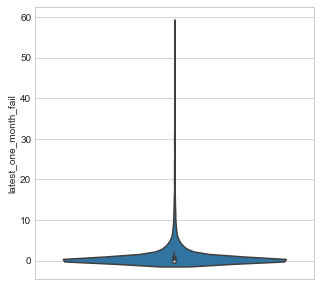

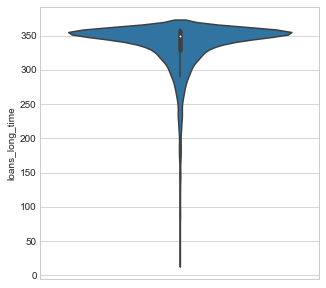

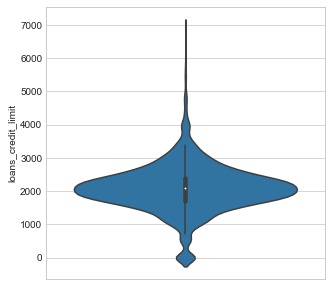

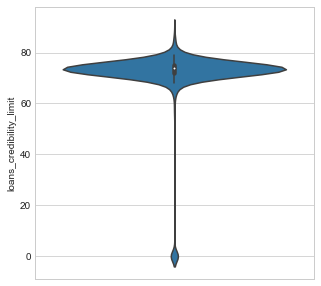

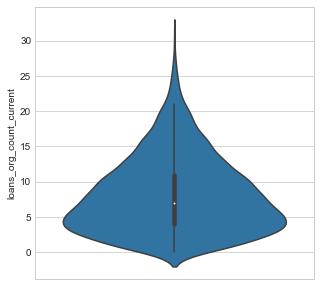

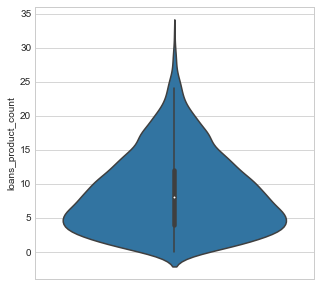

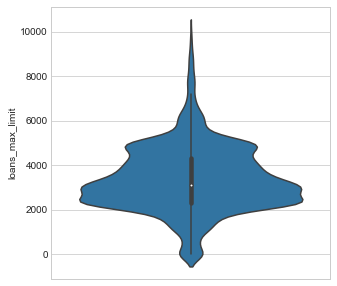

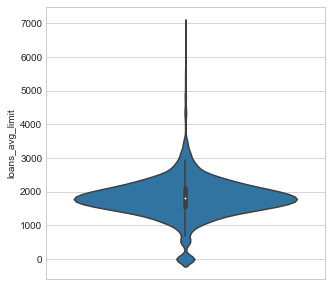

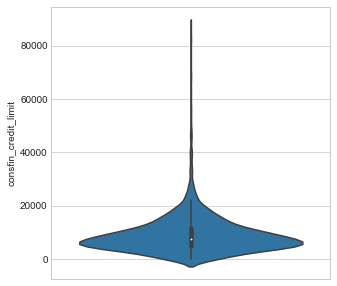

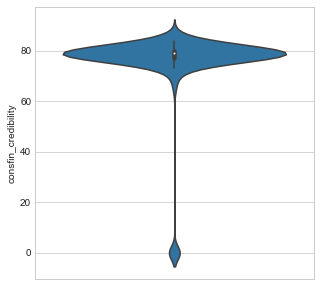

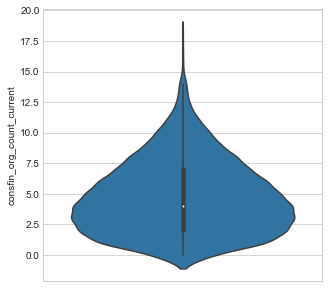

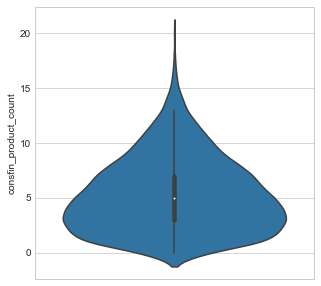

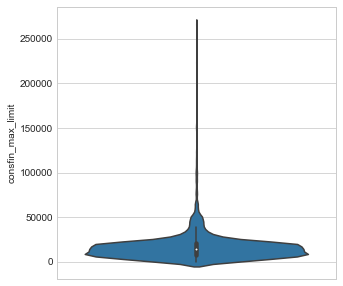

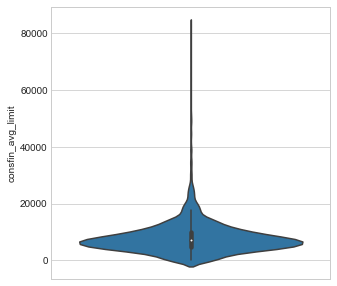

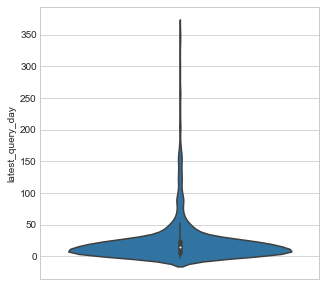

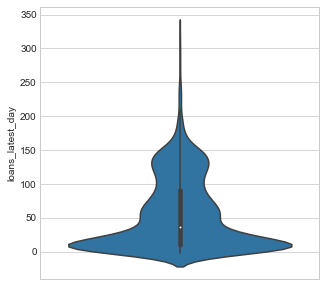

In [24]:
for i,col in enumerate(data_num.columns):
    plt.figure(i + 1,figsize=(5,5))
    #sns.boxplot(data_num[col])
    sns.violinplot(y=data_num[col])

**日期/时间型特征**

前面在object变量筛选时已经删除，此处或许可能重拿回（注意前面已经删除了部分index），将其拆分成year month day or time几个特征。
pd.to_datetime(data['latest_query_time']).dt.year

**数据标准化**  
受异常值的影响，这部分可能比较不理想

In [25]:
data_scaling = data.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
data_scaling.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0.000000,0.000019,0.488636,0.308370,0.375,0.094737,0.095652,0.50,...,0.29,0.244638,0.013777,0.862069,0.055556,0.10,0.004505,0.014493,0.038674,0.061538
1,0.02,0.94,0.029412,0.000027,1.000000,0.468062,0.425,0.105263,0.043478,0.75,...,0.35,0.254783,0.173364,0.919540,0.277778,0.30,0.085586,0.113043,0.016575,0.012308
2,0.04,0.96,0.000000,0.000021,1.000000,0.089207,0.275,0.238596,0.078261,0.00,...,0.16,0.181159,0.048220,1.000000,0.055556,0.05,0.015766,0.050725,0.011050,0.024615
3,0.00,0.96,0.029412,0.000003,0.511364,0.819383,0.500,0.049123,0.008696,0.50,...,0.32,0.223333,0.187141,0.919540,0.277778,0.25,0.112613,0.147101,0.011050,0.018462
4,0.01,0.99,0.000000,0.000010,1.000000,0.156388,0.275,0.231579,0.165217,0.00,...,0.23,0.236232,0.095293,0.908046,0.111111,0.10,0.031532,0.099638,0.066298,0.375385


**目标特征数据不均衡处理**

**采用SMOTE采样**  
步骤1:K均值聚类  
步骤2:以概率{P}选择一个聚类C,两个策略：聚类越大，采样率越低 or 聚类越大，采样率越高  
步骤3:聚类C中随机选择两个样本s1 s_2 ,计算新样本s_x :s_x = w * s_1 +(1+w * s_2 w∈（0，1）随机数  
步骤4:重复步骤2和步骤3，直至生成N和新样本  



In [26]:
#切分特征

data_scaling_Y = data['status'] 
data_scaling_X = data_scaling.drop('status',axis=1)
print(data_scaling_X.shape)
print(data_scaling_Y.shape)

(4457, 77)
(4457,)


In [27]:
#使用smote方法进行抽样处理
from imblearn.over_sampling import SMOTE # 过抽样处理库SMOTE
from imblearn.under_sampling import RandomUnderSampler # 欠抽样处理库RandomUnderSampler

model_smote=SMOTE() #建立SMOTE模型对象
x_smote_resampled,y_smote_resampled = model_smote.fit_sample(data_scaling_X,data_scaling_Y)#输入数据并作过抽样处理
x_smote_resampled = pd.DataFrame(x_smote_resampled,columns = data_scaling_X.columns)
y_smote_resampled = pd.DataFrame(y_smote_resampled,columns = ['status'])
smote_resampled = pd.concat([x_smote_resampled,y_smote_resampled],axis=1)#按列合并

print('抽样前样本总数：{}'.format(data['status'].shape[0]))
print('抽样前类别比例：{}'.format(data['status'].value_counts()[0]/len(data['status'])))

print('抽样后样本总数：{}'.format(smote_resampled.shape[0]))
print('抽样后好样本个数：{}'.format(smote_resampled.status.value_counts()[0]))
print('抽样后坏样本个数：{}'.format(smote_resampled.status.value_counts()[1]))


抽样前样本总数：4457
抽样前类别比例：0.74848552838232
抽样后样本总数：6672
抽样后好样本个数：3336
抽样后坏样本个数：3336


**特征筛选**  

**使用IV值筛选特征**  
计算一个变量的WOE编码  ·  分组·  计算WOE_i  ·  计算IV_i  ·  计算IV  

In [28]:
def IV_cal(X_var,Y_var):
    N_0 = np.sum(Y_var == 0)  #非响应客户
    N_1 = np.sum(Y_var == 1)  #响应客户
    N_0_group = np.zeros(np.unique(X_var).shape)#0矩阵，分组
    N_1_group = np.zeros(np.unique(X_var).shape)
    
    for i in range(len(np.unique(X_var))):
        #计算N_0和N_1各个组内相关值
        N_0_group[i] = Y_var[(X_var == np.unique(X_var)[i]) & (Y_var == 0)].count()
        N_1_group[i] = Y_var[(X_var == np.unique(X_var)[i]) & (Y_var == 1)].count()
        #  IV值
    IV = np.sum((N_0_group / N_0 - N_1_group / N_1) * np.log((N_0_group / N_0) / (N_1_group / N_1)))
        
    if IV >= 1.0:
                IV = 1    #处理极值？？必要???
    return IV

def IV_cal_batch(df,Y_var):#分批处理
    IVlist=[]
    for col in df.columns:
        IV = IV_cal(df[col],Y_var)
        IVlist.append(IV)
    names = list(df.columns)
    IV_df = pd.DataFrame({'特征':names,'IV值':IVlist},columns=['特征','IV值'])
    return IV_df,IVlist     

In [29]:
im_IV,IV_list = IV_cal_batch(data_scaling_X,data_scaling_Y)
threshold = 0.1 #阈值，小于0.02无用
data_del = []
for i in range(len(IV_list)):#遍历比较
    if im_IV['IV值'][i] < threshold:
        data_del.append(im_IV['特征'][i])
data_del # 筛选出来无用的特征

['regional_mobility',
 'student_feature',
 'top_trans_count_last_1_month',
 'reg_preference_for_trad',
 'consfin_product_count']

In [30]:
data_scaling_X.shape

(4457, 77)

**使用随机森林特征筛选**  
1.平均不纯度减少  
2.平均精确率减少

In [31]:
from sklearn.ensemble import RandomForestClassifier

def RandomFroest(X,Y):
    feat_lables = X.columns
    forest = RandomForestClassifier(n_estimators = 10000, random_state = 0,
                                    n_jobs = 1)
    forest.fit(X,Y)
    importance = forest.feature_importances_
    imp_result = np.argsort(importance)[::-1]#排序
    
    for i in range(X.shape[1]):
        print("第%2d个：特征名: %-*s 重要程度：%f" % (i+1, 30, feat_lables[i], importance[imp_result[i]]))#正则？+importanc
    threshold = 0.01 #阈值? 有什么理论依据?
    data_index = list(X.columns[importance < threshold])
    print('变量筛选前特征个数：{}'.format(X.shape)) #去除前的变量个数
    X.drop(data_index,axis = 1, inplace = True) #去除小于阈值的特征
    print('变量筛选后特征个数：{}'.format(X.shape))#剩下的变量
    return X
        

In [32]:
X = RandomFroest(data_scaling_X,data_scaling_Y)

第 1个：特征名: low_volume_percent             重要程度：0.049228
第 2个：特征名: middle_volume_percent          重要程度：0.048513
第 3个：特征名: take_amount_in_later_12_month_highest 重要程度：0.038839
第 4个：特征名: trans_amount_increase_rate_lately 重要程度：0.031988
第 5个：特征名: trans_activity_month           重要程度：0.026213
第 6个：特征名: trans_activity_day             重要程度：0.023729
第 7个：特征名: transd_mcc                     重要程度：0.017631
第 8个：特征名: trans_days_interval_filter     重要程度：0.017192
第 9个：特征名: trans_days_interval            重要程度：0.016319
第10个：特征名: regional_mobility              重要程度：0.016311
第11个：特征名: student_feature                重要程度：0.015635
第12个：特征名: repayment_capability           重要程度：0.015609
第13个：特征名: number_of_trans_from_2011      重要程度：0.015560
第14个：特征名: historical_trans_amount        重要程度：0.015476
第15个：特征名: historical_trans_day           重要程度：0.015404
第16个：特征名: rank_trad_1_month              重要程度：0.015337
第17个：特征名: trans_amount_3_month           重要程度：0.015192
第18个：特征名: avg_consume_less_12_valid_month 重要程度：0.014574